In [ ]:
import tensorflow as tf 
from tensorflow import keras 


In [ ]:

(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# exploring the data 
train_images.shape

(60000, 28, 28)

In [ ]:
# rows length 
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

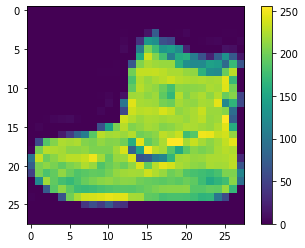

In [ ]:
# preprocesssing the data
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar() # side one with values vertical one 
plt.grid(False)
plt.show() 

In [ ]:
train_images = train_images /255.0
test_images = test_images /255.0

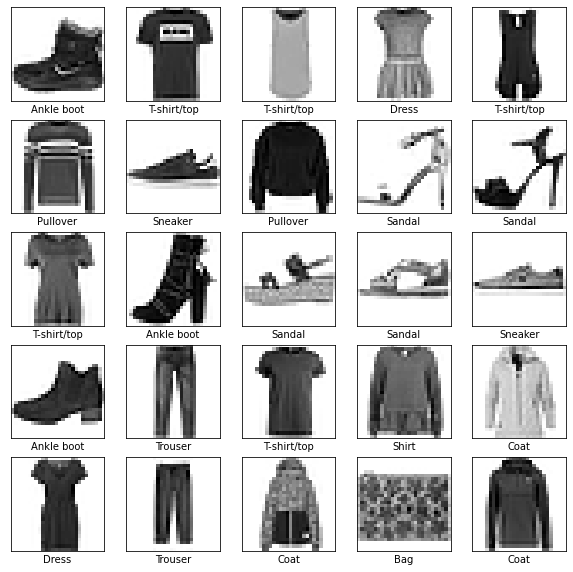

In [ ]:
# verifying ad we will find the first 25 images 

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1) # 5 row 5 coloums i the images to be 
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary )
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# now we wil build a model 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # first layer will faltten the input image into 784 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [ ]:
# compiling the model 
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits =True),metrics =['accuracy'])

In [ ]:
# training the model 
# feeding  
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4867 - accuracy: 0.8299
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3716 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3327 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3080 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2913 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2763 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2634 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2565 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2448 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

In [ ]:
#evaluating the accuracy 

test_loss ,test_acc = model.evaluate(test_images,test_labels,verbose =2)
print('\n test accuracy ',test_acc)

313/313 - 0s - loss: 0.3327 - accuracy: 0.8847

 test accuracy  0.8847000002861023


In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

array([1.9990063e-08, 1.0594871e-09, 2.8218963e-08, 1.4430578e-08,
       1.2743202e-08, 1.5592772e-03, 3.9369974e-07, 2.5849040e-03,
       3.7516179e-07, 9.9585491e-01], dtype=float32)

In [ ]:
import numpy as np
np.argmax(predictions[0])

9

In [ ]:
#so lets check  for it 
test_labels[0]

9

In [ ]:
# this is optional to graph this in image format 
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

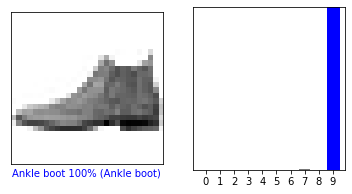

In [ ]:
#verify the predictions 
#With the model trained, you can use it to make predictions about some images.

#Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

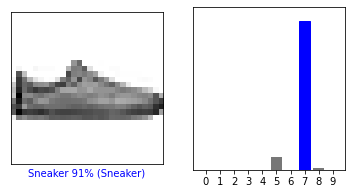

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

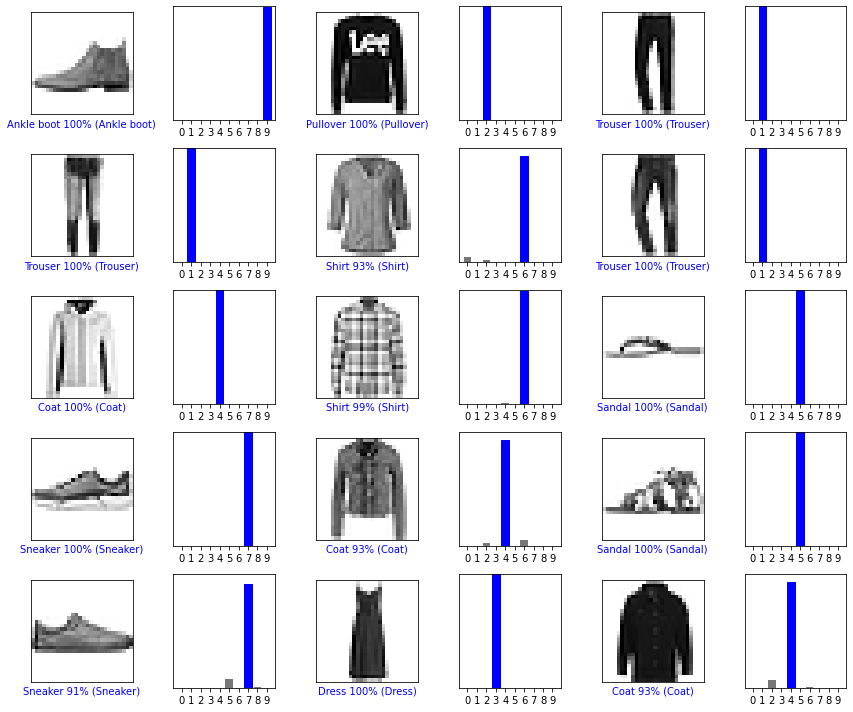

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# now usin thetrained model 
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[6.8169229e-06 6.0298429e-15 9.9930072e-01 7.7026948e-13 4.4663262e-04
  2.5115990e-12 2.4581703e-04 6.1112770e-18 2.5926355e-12 6.9064750e-15]]


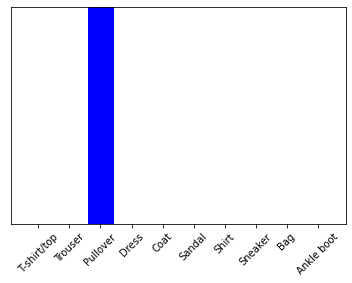

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2